# Question 1 - Alex Wiigs Stat 553 Final

**[10 marks] A data set in "DataSet1.csv" has observations for six variable $y_1,...,y_6$ from several groups (populations). Use this data set to perform hypothesis tests and discriminant analysis.**

In [ ]:
library(tidyverse)

First we should load in the data and do some exploratory analysis. In particular, we should look at how many groups the data contains, how many variables they have and the total number of samples in the data set.

In [2]:
# Load data 
data <- read.csv("/Users/alexwiigs/Documents/Code/STAT 553 Final/DataSet1.csv")
head(data)
# shows the number of groups, variables and the total number of samples in the data
num_groups <- max(data[,1])
num_variables <- data |> select(-group) |> ncol()
n <- nrow(data)
print(paste("Number of groups in the data set:", num_groups))
print(paste("Numer of variables in the data set:", num_variables ))
print(paste("Total number of samples in the data set:", n))

,group,y1,y2,y3,y4,y5,y6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.707869,4.278837,2.11668049,1.5988311,-0.3116434,-0.7212232
2,1,4.813089,3.943643,2.22508152,-1.3731751,-2.0235093,-0.5527398
3,1,7.598728,7.490672,0.72267853,0.1228908,-0.3456590,-0.9274571
4,1,7.707268,7.524177,-0.05352098,0.3776550,-0.7763228,-0.2856730
5,1,6.736214,5.065981,1.70665593,1.5999088,1.0570660,-0.1410927
6,1,4.928420,5.834367,-2.62305054,0.7447885,0.2523461,-0.6458310


[1] "Number of groups in the data set: 5"
[1] "Numer of variables in the data set: 6"
[1] "Total number of samples in the data set: 650"


In [3]:
# create function that gets number of samples in each group and print results
ni <- function(i) { data |> filter(group == i) |> select(-group) |> nrow() }
for (i in 1:num_groups) {print(paste("The number of samples in group:",i, ni(i))) }

[1] "The number of samples in group: 1 110"
[1] "The number of samples in group: 2 120"
[1] "The number of samples in group: 3 130"
[1] "The number of samples in group: 4 140"
[1] "The number of samples in group: 5 150"


Each group contains 10 more samples than the last. They are not of equal size. We have:  

The number of groups in the set, $k=5$.  
The number of variables: $p = 6$.   
The total number of samples in the data: $n = 650$

## (a) Are the population covariance matrices the same?

The groups in the data set above each represent a sample from five different populations with respective mean and covariance parameters $\mu_i$ and $\Sigma_i$ for $i = 1,...,5$. 

In order to test the equality of the $5$ multivariate population covariances described above, set up the following hypothesis:  

$H_0: \Sigma_1 = ... = \Sigma_5$  
$H_1: \text{At least two of the variances are not equal}$  

Box's M-test is an appropriate statstic to use to test the hypothesis. M can be calculated as
$$M = \frac{\prod_{i=1}^k |S_i|^{(n_i-1)/2} } { |S_{pl}|^{ \sum_{i=1}^k (n_i-1)/2 }} $$
where
$$S_{pl} = \frac{\sum_{i=1}^k (n_i-1)S_i}{ \sum_{i=}^k n_i-k }$$
$S_i$ represents the sample covariance for group $i$, $n_i$ is the number of samples in group $i$ and $k$ is the total number of groups. $S_{pl}$ is the pooled covariance. functions that can calcuate these formulas are given below.

In [4]:
Si <- function(i) { data |> filter(group == i) |> select(-group) |> cov() }
Spl <- function(data) {
    numerator = matrix(0, nrow = ncol(data[,-1]), ncol = ncol(data[,-1]))
    for (i in 1:num_groups) { numerator = numerator + (ni(i) - 1) * Si(i) }
    denominator = nrow(data) - num_groups
    return(numerator / denominator)}
M <- function(data) {
    numerator = 1
    exponent = 0
    for (i in 1:num_groups) {numerator = numerator * det(Si(i))^( (ni(i) - 1) / 2 ) }
    for (i in 1:num_groups) {exponent = exponent + (ni(i) - 1) / 2}
    return( numerator / ( det(Spl(data))^exponent ) )}

Box (1949, 1950) gave a $\chi^2$ approximation for the distrubtion of $M$, which is:
$$u = -2(1-c_1)\ln(M) \sim \chi^2_{[\frac{1}{2}(k-1)p(p+1)]}$$
where 
$$c_1 = [\sum_{i=1}^k \frac{1}{n_i-1} - \frac{1}{\sum_{i=1}^k (n_1 - 1) }][ \frac{2p^2 + 3p - 1}{6(p+1)(k-1)}]$$
and $p$ is the number of variables.

In [5]:
c1 <- function(data) {
    term1 = 0
    term2 = 0
    for (i in 1:num_groups) {
        term1 = term1 + 1 / (ni(i) -1)
        term2 = term2 + (ni(i) -1)}
    value <- (term1 - 1 / term2) *
    (2 * num_variables^2 + 3 * num_variables - 1) / (6 * (num_variables + 1) * (num_groups - 1))
    return(value)}
df <- (num_groups - 1) * num_variables * ( num_variables + 1) / 2
print(paste("degrees of freedom for the test statistic approximation:", df))

[1] "degrees of freedom for the test statistic approximation: 84"


Thus, we will reject the null hypothesis in favor of the alternative if:
$$u_{\text{calculated}} \geq \chi^2_{\alpha = 0.05, 84}$$ 

In [6]:
# Calculating the test statstic and rejection region. 
u <- -2 * (1 - c1(data)) * log(M(data))
rr <- qchisq(0.95, df)
p_value <- 1 - pchisq(u, df)
print(paste("Test statstic:", u))
print(paste("Rejection Region:", rr))
print(paste("The calcualted p-value for our observed test statistic is:", p_value))

[1] "Test statstic: 87.2703235703816"
[1] "Rejection Region: 106.394840242723"
[1] "The calcualted p-value for our observed test statistic is: 0.381932930940052"


Our calculated test statstic $u$ is not in the rejection region. Therefore we fail to reject the null hypothesis that the variances for the five group populations are different.

## (b) Are the population mean vectors the same?

By using a MANOVA model we can test if the the population mean vectors are the same. We can write each observation vector like so:

$$\textbf{y}_{ij} = \mu_i + \epsilon_{ij}$$
$i = 1, ..., 5$, $j = 1,..., n_i$
where $\mu_i$ represents the group mean for that vector and $\epsilon_{ij}$ represents the error from the group mean of that particular term. Assume:
$$\epsilon_{ij} \sim^{\text{i.i.d}} N_p(0, \Sigma )$$

By writing $\mu_i = \mu + \alpha_i$, where $\mu$ is the overall mean vector, and $\sum_{i=1}^5 \alpha_i =0$ we can state our null and alternative hypothesis as follows:  
  
$H_0: \alpha_1 = ... = \alpha_5 = 0$.     
$H_1:$ at least one $\alpha_i$ is not zero.

### Using Wilk's Test Statistic

The Wilks' Test Statistic can preform this hypothesis test. The test statstic is 
$$\Lambda = \frac{|E|}{|E+H|} $$
where we will reject $H_0$ if $\Lambda \leq \Lambda_{\alpha, p, v_H, v_E}$. The matrix $E$ is a covariance matrix that represents the variance "within" the differnt groups and the matrix $H$ is a covariance matrix that repesents the variance "between" each group and the overall average for all the groups. If $H$ is small relative to $E$, we will have little reason to reject the null hypothesis.  

We calculate the "between" Matrix $H$ with the following theorem:
$$H = \sum_{i=1}^k n_i(\bar{\textbf{y}}_{i\cdot} - \bar{\textbf{y}}_{\cdot \cdot} )(\bar{\textbf{y}}_{i\cdot} - \bar{\textbf{y}}_{\cdot \cdot} )'$$  

Where $\bar{\textbf{y}}_{i \cdot} = \sum_{j=1}^{n_i} \textbf{y}_{ij}/ n_i$ is the sample group mean, and $\bar{\textbf{y}}_{\cdot \cdot} = \sum_{i=1}^k \sum_{j=1}^{n_i} \textbf{y}_{ij} / n$ is the overall sample mean.

In [7]:
# Overall mean vector
overall_mean <- data |> select(-group) |> colSums() / ( n )
overall_mean <- overall_mean |> as.matrix()
# Calculate matrix where the rows are mean vectors for each of the five groups.
group_means <- data.frame()
for (i in 1:5) {
    temp_value <- data |> filter(group ==i) |> nrow()
    calculation <- data |> filter(group == i) |> select(-group) |> colSums() / temp_value
    group_means <- bind_rows(group_means, calculation)
    } 
group_means <- group_means |> as.matrix()

In [8]:
# Calculate the H matrix
H <- matrix(0, nrow = 6, ncol = 6)
for (i in 1:5) {
    ni <- data |> filter(group == i) |> select(-group) |> nrow()
    H <- H + ni * ( as.matrix(group_means[i,]) - overall_mean ) %*% 
    t( as.matrix(group_means[i,]) - overall_mean )  }
print(paste("The calculted H matrix:"))
round(H,2)

[1] "The calculted H matrix:"


,y1,y2,y3,y4,y5,y6
y1,25943.40,5165.60,29282.66,115.18,14.79,-3.07
y2,5165.60,9957.73,1464.52,-63.65,-44.85,67.41
y3,29282.66,1464.52,39234.27,214.80,118.35,4.02
y4,115.18,-63.65,214.80,8.62,0.77,-2.39
y5,14.79,-44.85,118.35,0.77,1.83,0.60
y6,-3.07,67.41,4.02,-2.39,0.60,1.60


Our formula for the "within" matrix $E$ is:
$$ E = \sum_{i=1}^k \sum_{j=1}^{n_i} (\textbf{y}_{ij} - \bar{ \textbf{y} }_{i \cdot} ) (\textbf{y}_{ij} - \bar{ \textbf{y} }_{i\cdot} )'$$ 

In [9]:
# Calculate the E matrix
E <- matrix(0, nrow = 6, ncol = 6)
for (i in 1:5) {
    for ( j in 1:nrow(filter(data, group == i))) {
        y_ij <- data |> filter(group == i) |> select(-group) |> slice(j)
        E <- E + (t(y_ij) - group_means[i,] ) %*% t(t(y_ij) - group_means[i,] ) }}
print(paste("The calculated E matrix:"))
round(E,2)

[1] "The calculated E matrix:"


,y1,y2,y3,y4,y5,y6
y1,1203.34,563.79,691.20,14.37,-6.19,-4.71
y2,563.79,1304.08,-691.18,27.51,-5.94,-29.81
y3,691.20,-691.18,2020.05,-61.92,-15.48,11.81
y4,14.37,27.51,-61.92,585.53,32.29,-12.27
y5,-6.19,-5.94,-15.48,32.29,570.52,22.14
y6,-4.71,-29.81,11.81,-12.27,22.14,315.86


Now that we have calculated the matrices we can calculate the test statistic.

$\Lambda_{observed}:$

In [10]:
Lambda <- det(E) / det( E + H)
print(paste("The calcualted test statistics is:", Lambda))

[1] "The calcualted test statistics is: 0.00055361287165637"


To calculate the critical value $\Lambda_{\alpha, p, v_H, v_E}$, we have: 

$p = \text{number of variables} = 6$  
$v_H = \text{degrees of freedom for between matrix} = k - 1 = 4$  
$v_E = \text{Degrees of freedom for within matrix} = N - k = 645$  

"Methods of Multivariate Analysis" Table A.09 provides the critical value $\Lambda_{\alpha = 0.05, p = 6, v_H = 4, v_E = 600} = 0.918$. Our calculated value falls within the rejection region, so we reject $H_0$ in favor of the alternative.

**Confirm and p-value**

We can confirm our calculation and obtain the p-value by using the manova function in R.

In [11]:
data_manova <- manova(as.matrix(data[,-1]) ~ as.factor(data[,1]) )
summary(data_manova, test = "Wilks")

                      Df      Wilks approx F num Df den Df    Pr(>F)    
as.factor(data[, 1])   4 0.00055361   705.67     24 2233.9 < 2.2e-16 ***
Residuals            645                                                
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Our test statistic matches the manova output and the accompanying p-value is essentially zero. We can be confident in our decision to reject $H_0$ in favor of the alternative.

### Using Roy's Test Statstic:

Alternatively, we could have used Roy's test as our test statstic:
$$\theta = \frac{\lambda_1}{\lambda_1 + 1}$$
$\lambda_1$ is the largest eigenvalue of $\textbf{E}^{-1}\textbf{H}$.  

We reject $H_0$ if $\theta \geq \theta_{\alpha, s,m,n}$
  
where  
$s = \min (v_h,p) = v_h = 4$  
$m = \frac{1}{2} (|v_H -p| - 1) = \frac{1}{2} (|4-6| - 1) = 1/2$  
$N = \frac{1}{2}(v_E - p -1) = \frac{1}{2}(645 -1 - 6 - 1) = 318$

$\theta_{observed}:$

In [12]:
# Observed test statstic
lambda_1 <- eigen(solve(E) %*% H)$values |> max()
theta <- lambda_1 / (lambda_1 + 1)
print(paste("The observed test stastic:", theta))

[1] "The observed test stastic: 0.965461801102574"


"Methods of Multivariate Analysis" Table A.10 provides the critical value $\theta_{\alpha = 0.05, s = 4, m = 1, N = 240} = 0.047$. Our oberserved test statistic is within the rejrection region. Therefore we reject $H_0$ in favor of the alternative.

**Confirm and p-value**

In [13]:
round(lambda_1,3)
summary(data_manova, test = "Roy")

[1] 27.953

                      Df    Roy approx F num Df den Df    Pr(>F)    
as.factor(data[, 1])   4 27.953   2995.7      6    643 < 2.2e-16 ***
Residuals            645                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Once again, manova has confirmed our test statistic (manova outputs $\lambda_1$ instead of $\theta$) and the accompanying p-value is essentially zero. We have confirmation that we are correct to reject $H_0$ in favor of the alternative.

## (c) Find discriminant functions and use the first two discriminant functions to show the data set.

We can obtain $s$ discriminant functions, $\textbf{a}_i$, from the $s$ eigenvectors of the matrix $\textbf{E}^{-1} \textbf{H}$. By using matrix multiplication of the transpose of a disciminant function by our data matrix, we transform each data entry vector into a point on the numberline. 
$$\textbf{z}_i = \textbf{a}_i' \textbf{y}$$
In this way the eigenvalues represent the scaling factor of the entries as they get squished onto the numberline, seperating the the points. Thus, the discriminant function with the highest assoisiated eigenvalue will be most important in explaining the data, followed by the second highest and so on. This means we can account for the for relative importance a disciminant function has in explaining the data by dividing its associated eigenvalue by the sum of all $s$ eigenvalues.
$$\text{Relative importance of } \textbf{z}_i = \frac{\lambda_i}{\sum_{j=1}^s \lambda_j}$$  

Calculating the two discriminant functions of $\textbf{E}^{-1} \textbf{H}$ with the greatest relative importance gives the vectors

In [14]:
eigens <- eigen( solve(E) %*% H ) 
a <- unname( cbind(eigens$vectors[,1], eigens$vectors[,2]))
colnames(a) <- c("a1'", "a2'")
t(round(a,3))

a1',-0.379,-0.470,-0.794,-0.063,-0.031,-0.024
a2',-0.609,0.695,0.378,0.019,0.008,0.054


where the relative importance of $\textbf{a}_i$ is

In [15]:
Importance <- cbind(eigens$values[1] / sum(eigens$values), eigens$values[2] / sum(eigens$values))
colnames(Importance) <- c("a1", "a2")
rownames(Importance) <- c("Relative Importance:")
round(Importance,4)

,a1,a2
Relative Importance:,0.6162,0.3175


The two discriminant functions account for almost the entirety of the group differences. 

**Graphing The Data Set With Two Discriminant Functions**

By creating a graph where $z_1$ is the x-axis and $z_2$ is the y-axis we can plot the seperation created by the discriminant functions like so.

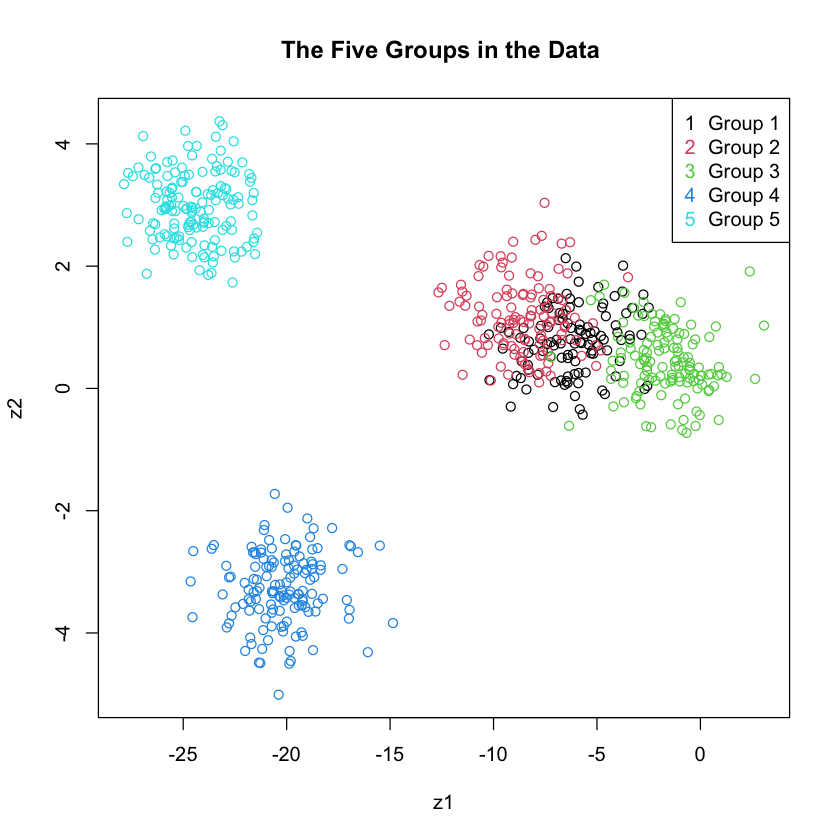

In [16]:
z1 <- t(a[,1]) %*% t(data[,-1])
z2 <- t(a[,2]) %*% t(data[,-1])
plot(z1,z2, col = data$group, main = "The Five Groups in the Data ")
legend("topright", legend = paste("Group", 1:5), , pch = as.character(1:5), col = 1:5)

The graph matches the intuition we gained from calcualting the relative importance where it looks like $z_1$ can sort about two thirds of the data and $z_2$ can sort about a third.